In [86]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [87]:
import warnings
warnings.filterwarnings('ignore')

In [113]:
books = pd.read_csv('Books/Books Dataset/books.csv', sep=';', error_bad_lines=False)
books.sample(10)

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
264055,1581170238,"Monster Pops: Dinner Time, Oh My a Fly, Small ...",Jan Pienkowski,2000,Piggy Toes Press,http://images.amazon.com/images/P/1581170238.0...,http://images.amazon.com/images/P/1581170238.0...,http://images.amazon.com/images/P/1581170238.0...
177806,3791512013,Mein zweites Ich. ( Ab 13 J.).,Lael Littke,2000,Dressler Verlag,http://images.amazon.com/images/P/3791512013.0...,http://images.amazon.com/images/P/3791512013.0...,http://images.amazon.com/images/P/3791512013.0...
130171,0060934662,Resuscitation of a Hanged Man,Denis Johnson,2001,Perennial,http://images.amazon.com/images/P/0060934662.0...,http://images.amazon.com/images/P/0060934662.0...,http://images.amazon.com/images/P/0060934662.0...
265399,0142300934,When I Was Older,Garret Weyr,2002,Puffin Books,http://images.amazon.com/images/P/0142300934.0...,http://images.amazon.com/images/P/0142300934.0...,http://images.amazon.com/images/P/0142300934.0...
56932,0805058265,"Passionate Marriage: Love, Sex, and Intimacy i...",David Schnarch,1998,Owl Books (NY),http://images.amazon.com/images/P/0805058265.0...,http://images.amazon.com/images/P/0805058265.0...,http://images.amazon.com/images/P/0805058265.0...
134617,0006375340,The Green Age Diet Plan,Elliot Rose,1990,HarperCollins Publishers,http://images.amazon.com/images/P/0006375340.0...,http://images.amazon.com/images/P/0006375340.0...,http://images.amazon.com/images/P/0006375340.0...
151181,0743463064,Killer's Payoff (87th Precinct Mysteries (Pape...,Ed McBain,2002,Pocket,http://images.amazon.com/images/P/0743463064.0...,http://images.amazon.com/images/P/0743463064.0...,http://images.amazon.com/images/P/0743463064.0...
158579,0830811877,The Creative Life: A Workbook for Unearthing t...,Alice Bass,2001,InterVarsity Press,http://images.amazon.com/images/P/0830811877.0...,http://images.amazon.com/images/P/0830811877.0...,http://images.amazon.com/images/P/0830811877.0...
157949,8401421578,LA Casa De Las Mil Virgenes,Arturo Azuela,1996,Aims Intl Books,http://images.amazon.com/images/P/8401421578.0...,http://images.amazon.com/images/P/8401421578.0...,http://images.amazon.com/images/P/8401421578.0...
38813,0486200019,Flatland,Edwin A. Abbott,1975,Dover Publications,http://images.amazon.com/images/P/0486200019.0...,http://images.amazon.com/images/P/0486200019.0...,http://images.amazon.com/images/P/0486200019.0...


In [89]:
ratings = pd.read_csv('Books/Books Dataset/ratings.csv', sep=';', error_bad_lines=False)
ratings.sample(5)

,User-ID,ISBN,Book-Rating
1133860,272225,0425154092,0
504997,122802,0440227534,0
490977,117111,0553576143,0
389105,93872,1570624240,0
407593,98391,0373764421,8


In [90]:
users = pd.read_csv('Books/Books Dataset/users.csv', sep=';', error_bad_lines=False)
users.sample(5)

,User-ID,Location,Age
160604,160605,"elmendorf afb, alaska, usa",27.0
155730,155731,"reguengos de monsaraz, alentejo, portugal",45.0
125697,125698,"kirkland lake, ontario, canada",29.0
273610,273611,"montreal, quebec, canada",34.0
31670,31671,"tucson, arizona, usa",42.0


#### Clean the data

In [116]:
# Let's rename the columns for easier use
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 
                 'imageUrlS', 'imageUrlM', 'imageUrlL']

In [117]:
# We don't need the images
books.drop(['imageUrlS', 'imageUrlM', 'imageUrlL'],axis=1,inplace=True)

In [93]:
# Let's start cleaning the data
# First we look at the yearOfPublication
books.yearOfPublication.unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [94]:
# We have some incorrect values - DK Publishing Inc, Gallimard - let's remove those
books = books[(books.yearOfPublication != 'DK Publishing Inc')
              & (books.yearOfPublication != 'Gallimard')]

In [95]:
# Now we can set the type of the column to int
books.yearOfPublication = books.yearOfPublication.astype('int32')
books.dtypes

ISBN                 object
bookTitle            object
bookAuthor           object
yearOfPublication     int32
publisher            object
dtype: object

In [96]:
# Now let's look at publisher
books = books.dropna(subset=['publisher']) # we drop the rows that don't have a publisher filled in
books.publisher.isnull().sum()

0

In [118]:
books.sample(10)

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
34449,0449906116,Husband Is the Past Tense of Daddy and Other D...,Teryl Zarnow,1991,Ballantine Books
112680,0393955370,The Spanish American Revolution 1808-1826 (Rev...,John Lynch,1986,W. W. Norton &amp; Company
181089,0805025367,Ancestral Truths,Sara Maitland,1994,Henry Holt &amp; Co
191482,3293202519,Du meine Pappel im roten Kopftuch.,Tschingis Aitmatow,2003,Unionsverlag
174209,0806517956,The Cheapskate's Guide to Living Cheaper and B...,Leslie Hamilton,1996,Carol Publishing Corporation
120960,0312959796,Dreams of You (Dreams of You),Tina Wainscott,1996,St. Martin's Press
34305,0060152567,Infante's Inferno,G. Cabrera Infante,1984,Harpercollins
262461,0207187320,My Brother Jack,George Johnston,0,Harpercollins Publisher
87090,0020310501,Dangerous Curves: A Slim Callaghan Mystery (Sl...,Peter Cheyney,1989,Simon &amp; Schuster
268737,0316690694,The Siege : A Family's Journey Into the World ...,Clara Claiborne Park,1982,Back Bay Books


In [97]:
# Let's look at users
users.columns = ['userID', 'Location', 'Age']
users.shape
users.head()

,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [98]:
print(sorted(users.Age.unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

In [99]:
# The age column has some nan and some values which don't make sense (>100)
# we'll replace the values above 90 and under 18 with nan
users.loc[(users.Age > 90) | (users.Age < 18), 'Age'] = np.nan

In [100]:
# even better, we'll calculate the mean for the age and use that as filler
meanAge = users.Age.mean()
print(f"Mean age: {meanAge}")
users.Age = users.Age.fillna(meanAge)

Mean age: 36.161480728134094


In [101]:
# now we can change the type to int
users.Age = users.Age.astype(np.int32)

In [102]:
print(sorted(users.Age.unique()))

[18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]


In [103]:
# Let's move on to ratings
ratings.columns = ['userID', 'ISBN', 'bookRating']
ratings.sample(5)

,userID,ISBN,bookRating
106181,24342,068480283x,10
1141025,274308,0373292090,0
712633,172742,055321246X,0
199026,44450,0345422406,0
303738,72601,3596259924,0


In [104]:
# we're only interested in ratings for books that are in our books dataframe
ratings_new = ratings[ratings.ISBN.isin(books.ISBN)]

In [105]:
ratings_new.shape

(1031130, 3)

In [106]:
# some books have a rating of 0, they don't serve our purpose
ratings_clean = ratings_new[ratings_new.bookRating != 0]

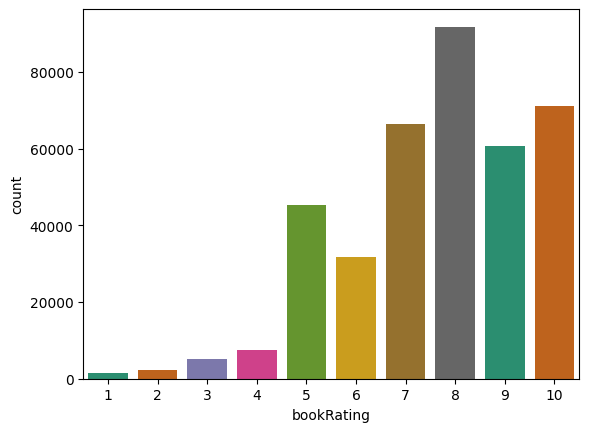

In [107]:
# let's visualise the data
sns.countplot(data=ratings_clean , x='bookRating', palette='Dark2')
plt.show();

**Now we can export the cleaned dataframe to CSV for importing into MySQL**

In [108]:
pd.DataFrame.to_csv(books, 'Books/Books Dataset/cb.csv', index=False)

In [109]:
pd.DataFrame.to_csv(ratings_clean, 'Books/Books Dataset/cr.csv', index=False)

In [110]:
pd.DataFrame.to_csv(users, 'Books/Books Dataset/cu.csv', index=False)

In [111]:
# To create the fields in mysql we will need to have an idea on the maximum length for each column
def max_string_length(file_path):
    df = pd.read_csv(file_path)
    max_lengths = {col: df[col].astype(str).map(len).max() for col in df.columns}
    return max_lengths

In [112]:
max_string_length('Books/Books Dataset/cb.csv')

{'ISBN': 13,
 'bookTitle': 255,
 'bookAuthor': 143,
 'yearOfPublication': 4,
 'publisher': 134}